In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.1.3
3.4.2


In [3]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation2 import get_model_for_problem_formulation, sum_over, sum_over_time

In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(1)

In [5]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [6]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [8]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('Expected Annual Damage', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage'), function=<function sum_over at 0x158ee36a0>)
ScalarOutcome('RfR Total Costs', variable_name=('RfR Total Costs',), function=<function sum_over at 0x158ee36a0>)
ScalarOutcome('Dike Investment Costs', variable_name=('RfR Total Costs',), function=<function sum_over at 0x158ee36a0>)


In [9]:
# running the model through EMA workbench
with (MultiprocessingEvaluator(dike_model) as evaluator):
    results= evaluator.perform_experiments(scenarios=100, policies=275)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 100 scenarios * 275 policies * 1 model(s) = 27500 experiments
100%|████████████████████████████████████| 27500/27500 [17:07<00:00, 26.77it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [11]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Expected Annual Damage', 'RfR Total Costs', 'Dike Investment Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,29,129.776187,1.0,0.324633,66.375548,10.0,0.635944,106.377233,1.5,0.676272,...,9,7,6,8,1,0,0,275,0,dikesnet
1,47,50.390137,1.5,0.123135,253.813443,10.0,0.874831,175.880355,1.0,0.946959,...,9,7,6,8,1,0,0,276,0,dikesnet
2,71,223.972583,10.0,0.010776,155.935805,1.5,0.715082,201.929206,1.0,0.495245,...,9,7,6,8,1,0,0,277,0,dikesnet
3,68,239.878142,1.0,0.344735,74.569215,10.0,0.826699,344.747660,1.0,0.059348,...,9,7,6,8,1,0,0,278,0,dikesnet
4,7,177.991922,10.0,0.801558,158.114813,10.0,0.130129,320.290047,10.0,0.430150,...,9,7,6,8,1,0,0,279,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,34,254.629903,1.5,0.989602,61.715170,10.0,0.808306,127.371556,10.0,0.575951,...,4,10,5,3,9,6,3,370,274,dikesnet
27496,58,282.976700,10.0,0.463976,101.907995,1.0,0.281551,52.035704,10.0,0.109630,...,4,10,5,3,9,6,3,371,274,dikesnet
27497,89,301.457635,1.5,0.788836,96.000849,1.0,0.922297,80.067630,1.5,0.382546,...,4,10,5,3,9,6,3,372,274,dikesnet
27498,36,116.252042,1.5,0.908708,242.431798,1.0,0.573762,120.295218,1.5,0.251576,...,4,10,5,3,9,6,3,373,274,dikesnet


In [12]:
experiments.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model'],
      dtype='object')

In [13]:
# only works because we have scalar outcomes
outcomes_pd = pd.DataFrame(outcomes)
outcomes_pd

,Expected Annual Damage,RfR Total Costs,Dike Investment Costs
0,0.000000e+00,9.469000e+08,9.469000e+08
1,0.000000e+00,9.469000e+08,9.469000e+08
2,0.000000e+00,9.469000e+08,9.469000e+08
3,1.483765e+06,9.469000e+08,9.469000e+08
4,2.202622e+07,9.469000e+08,9.469000e+08
...,...,...,...
27495,2.870583e+05,1.420800e+09,1.420800e+09
27496,3.255931e+07,1.420800e+09,1.420800e+09
27497,7.308824e+06,1.420800e+09,1.420800e+09
27498,1.461291e+07,1.420800e+09,1.420800e+09


In [14]:
tot = experiments.join(outcomes_pd)
tot


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model,Expected Annual Damage,RfR Total Costs,Dike Investment Costs
0,29,129.776187,1.0,0.324633,66.375548,10.0,0.635944,106.377233,1.5,0.676272,...,8,1,0,0,275,0,dikesnet,0.000000e+00,9.469000e+08,9.469000e+08
1,47,50.390137,1.5,0.123135,253.813443,10.0,0.874831,175.880355,1.0,0.946959,...,8,1,0,0,276,0,dikesnet,0.000000e+00,9.469000e+08,9.469000e+08
2,71,223.972583,10.0,0.010776,155.935805,1.5,0.715082,201.929206,1.0,0.495245,...,8,1,0,0,277,0,dikesnet,0.000000e+00,9.469000e+08,9.469000e+08
3,68,239.878142,1.0,0.344735,74.569215,10.0,0.826699,344.747660,1.0,0.059348,...,8,1,0,0,278,0,dikesnet,1.483765e+06,9.469000e+08,9.469000e+08
4,7,177.991922,10.0,0.801558,158.114813,10.0,0.130129,320.290047,10.0,0.430150,...,8,1,0,0,279,0,dikesnet,2.202622e+07,9.469000e+08,9.469000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,34,254.629903,1.5,0.989602,61.715170,10.0,0.808306,127.371556,10.0,0.575951,...,3,9,6,3,370,274,dikesnet,2.870583e+05,1.420800e+09,1.420800e+09
27496,58,282.976700,10.0,0.463976,101.907995,1.0,0.281551,52.035704,10.0,0.109630,...,3,9,6,3,371,274,dikesnet,3.255931e+07,1.420800e+09,1.420800e+09
27497,89,301.457635,1.5,0.788836,96.000849,1.0,0.922297,80.067630,1.5,0.382546,...,3,9,6,3,372,274,dikesnet,7.308824e+06,1.420800e+09,1.420800e+09
27498,36,116.252042,1.5,0.908708,242.431798,1.0,0.573762,120.295218,1.5,0.251576,...,3,9,6,3,373,274,dikesnet,1.461291e+07,1.420800e+09,1.420800e+09


[MainProcess/INFO] no time dimension found in results


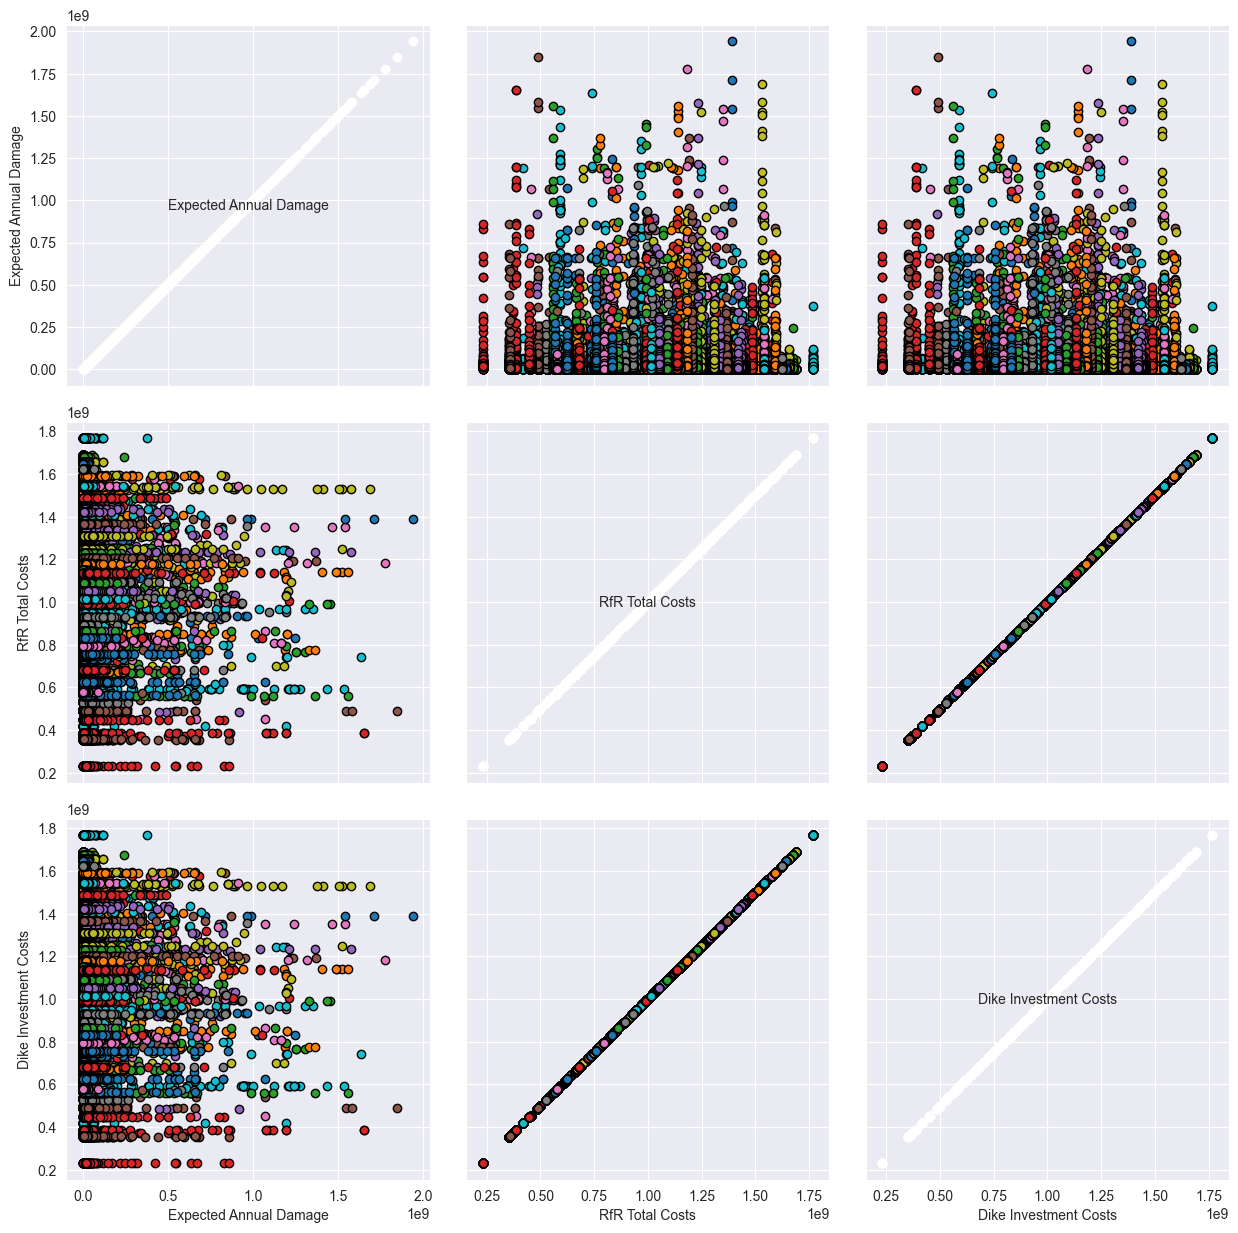

In [15]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(tot, outcomes, group_by='policy',legend=False)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

In [16]:
tot_policy = tot.groupby('policy').mean(numeric_only=True)
tot_policy.sort_values(by=tot_policy.columns[-1], ascending=True, inplace=True)
tot_policy

/var/folders/cq/_rbxzkq17533m5qdt1c__dyw0000gn/T/ipykernel_67654/255886294.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tot_policy = tot.groupby('policy').mean(numeric_only=True)


,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.2_Bmax,A.2_pfail,A.3_Bmax,A.3_pfail,A.4_Bmax,A.4_pfail,A.5_Bmax,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,Expected Annual Damage,RfR Total Costs,Dike Investment Costs
policy,,,,,,,,,,,,,,,,,,,,,
93,65.98,189.929931,0.500359,190.055621,0.499899,189.935163,0.500245,190.051077,0.500444,189.989102,...,5.0,8.0,4.0,6.0,9.0,0.0,1.0,7.928097e+07,2.306000e+08,2.306000e+08
165,65.98,189.929931,0.500359,190.055621,0.499899,189.935163,0.500245,190.051077,0.500444,189.989102,...,2.0,3.0,2.0,6.0,8.0,10.0,4.0,7.765812e+07,3.518000e+08,3.518000e+08
123,65.98,189.929931,0.500359,190.055621,0.499899,189.935163,0.500245,190.051077,0.500444,189.989102,...,1.0,10.0,3.0,3.0,7.0,8.0,4.0,2.182936e+07,3.518000e+08,3.518000e+08
235,65.98,189.929931,0.500359,190.055621,0.499899,189.935163,0.500245,190.051077,0.500444,189.989102,...,2.0,8.0,9.0,0.0,5.0,9.0,0.0,4.239961e+07,3.577000e+08,3.577000e+08
10,65.98,189.929931,0.500359,190.055621,0.499899,189.935163,0.500245,190.051077,0.500444,189.989102,...,7.0,1.0,9.0,7.0,9.0,7.0,0.0,1.757071e+07,3.638000e+08,3.638000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,65.98,189.929931,0.500359,190.055621,0.499899,189.935163,0.500245,190.051077,0.500444,189.989102,...,0.0,0.0,2.0,0.0,8.0,7.0,0.0,1.542037e+07,1.657300e+09,1.657300e+09
105,65.98,189.929931,0.500359,190.055621,0.499899,189.935163,0.500245,190.051077,0.500444,189.989102,...,8.0,9.0,4.0,10.0,7.0,9.0,3.0,7.534018e+05,1.669300e+09,1.669300e+09
132,65.98,189.929931,0.500359,190.055621,0.499899,189.935163,0.500245,190.051077,0.500444,189.989102,...,2.0,7.0,2.0,10.0,0.0,7.0,0.0,8.482149e+06,1.676900e+09,1.676900e+09


In [17]:
# code blok mean/max/min
# Zet de outcomes om naar een dataframe
outcomes_df = pd.DataFrame.from_dict(outcomes)

# Selecteer de juiste kolommen (kosten en schade)
columns = ["RfR Total Costs", "Expected Annual Damage"]

# Bereken mean, max, min
summary = outcomes_df[columns].agg(['mean', 'max', 'min'])

# Zet kosten om naar miljoenen euro (zoals in voorbeeldtabel)
summary.loc[:, "RfR Total Costs"] = summary["RfR Total Costs"] / 1e6
summary.loc[:, "Expected Annual Damage"] = summary["Expected Annual Damage"] / 1e6

# Rond af op 2 decimalen
summary = summary.round(2)

# Herbenoem de rijen voor helderheid
summary.index = ['Mean', 'Maximum', 'Minimum']
summary

,RfR Total Costs,Expected Annual Damage
Mean,1065.08,46.28
Maximum,1767.40,1941.91
Minimum,230.60,0.00


In [18]:
summary

,RfR Total Costs,Expected Annual Damage
Mean,1065.08,46.28
Maximum,1767.40,1941.91
Minimum,230.60,0.00


In [20]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

In [21]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [00:08<00:00, 34.26it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [22]:
experiments, outcomes = results

In [23]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,Expected Annual Damage,RfR Total Costs,Dike Investment Costs
0,2.390577e+08,253800000.0,253800000.0
1,2.539202e+08,253800000.0,253800000.0
2,1.389265e+08,253800000.0,253800000.0
3,1.834885e+09,253800000.0,253800000.0
4,1.078263e+09,253800000.0,253800000.0
...,...,...,...
295,3.293262e+08,369700000.0,369700000.0
296,1.843341e+08,369700000.0,369700000.0
297,1.140606e+08,369700000.0,369700000.0
298,1.319206e+08,369700000.0,369700000.0


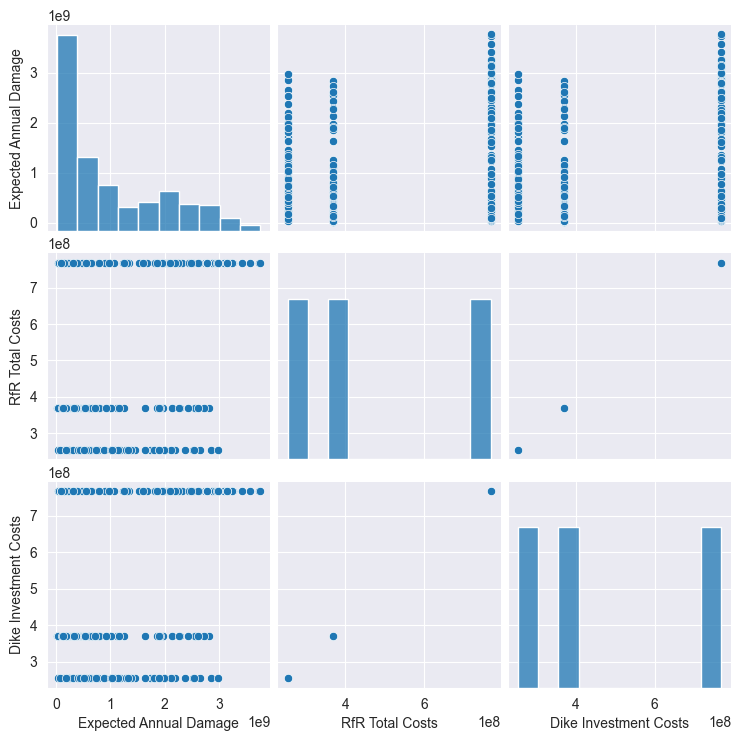

In [24]:
sns.pairplot(pd.DataFrame.from_dict(outcomes))
plt.show()

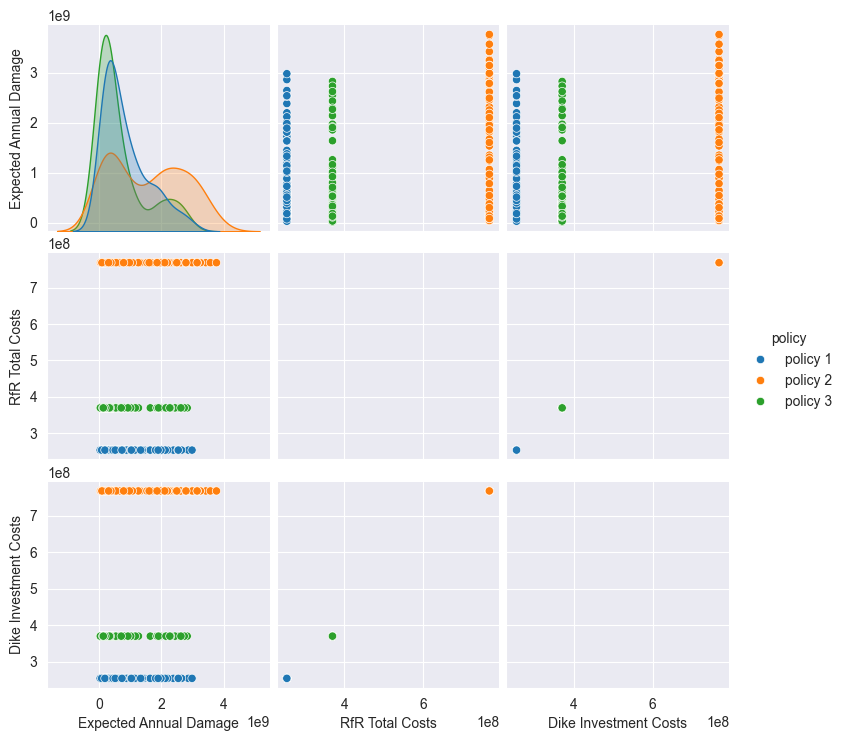

In [25]:
policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

sns.pairplot(data, hue='policy',  vars=outcomes.keys(), )
plt.show()

In [26]:
from ema_workbench import save_results

# Zorg ervoor dat 'results' bestaat in je notebook:
# results = perform_experiments(...)
# experiments, outcomes = results

save_results(results, 'dike_open_exploration_results.tar.gz')

[MainProcess/INFO] results saved successfully to /Users/evalievanoijen/PycharmProjects/group25_mbdm/final assignment/dike_open_exploration_results.tar.gz


In [31]:
from ema_workbench import load_results, save_results

# Laad de bestaande resultaten
results = load_results("dike_open_exploration_results.tar.gz")
experiments, outcomes = results

# Maak een nieuwe samengestelde outcome
# Voeg de drie bestaande kostencomponenten samen
outcomes["All Costs"] = (
    outcomes["RfR Total Costs"]
    + outcomes["Dike Investment Costs"]
    + outcomes["Expected Annual Damage"]
)


[MainProcess/INFO] results loaded successfully from /Users/evalievanoijen/PycharmProjects/group25_mbdm/final assignment/dike_open_exploration_results.tar.gz
